In [16]:
import numpy as np
from matplotlib import pyplot as plt 
import sys
sys.path.append('./src/')
import geometry
from scipy.special import p_roots
from scipy.integrate import quad
from copy import deepcopy

In [3]:
int1, abserr,_,msg  = quad(geometry._bump,-1,1,epsabs=1e-15,epsrel=1e-15, full_output=1)
print(msg)
print('abs error is ', abserr, ' maybe this is enough')

The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
abs error is  4.9343864429293055e-15  maybe this is enough


In [20]:
def bump(x,h=1):
    return geometry._bump(x/h)/(int1*h)
def convoluted_abs(x,h=1):
    if np.abs(x) >= h:
        return np.abs(x)
    b = lambda y: bump(y,h)*np.abs(x-y)
    return quad(b,-h,h,epsabs=1e-15,epsrel=1e-15,full_output=1)[0]
    
def d_convoluted_abs(x,h=1):
    if np.abs(x) >= h:
        return np.sign(x)
    b = lambda y: bump(y,h)*np.sign(x-y)
    return quad(b,-h,h, full_output=1)[0]
def dd_convoluted_abs(x,h=1):
    if np.abs(x) >= h:
        return 0
    return 2*bump(x,h)

# a standard smooth corner

In [45]:
smooth_corner = geometry.geometry()
a, da = p_roots(1024)
smooth_corner.a = a
smooth_corner.da = da
smooth_corner.x = a.copy()
smooth_corner.y = np.array([convoluted_abs(x_) for x_ in x])
smooth_corner.dx_da = np.ones(a.shape)
smooth_corner.dy_da = np.array([d_convoluted_abs(x_) for x_ in smooth_corner.x])
smooth_corner.ddx_dda = np.zeros(a.shape)
smooth_corner.ddy_dda = np.array([dd_convoluted_abs(x_) for x_ in smooth_corner.x])

In [54]:
smooth_corner.scale((1,1/2))

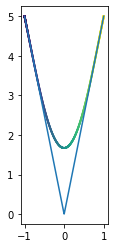

In [55]:
fig, ax = plt.subplots()
ax.scatter(smooth_corner.x,smooth_corner.y,c=smooth_corner.a,s=1)
ax.plot(smooth_corner.x,5*np.abs(smooth_corner.x))
ax.set_aspect('equal')

the angel in between can be determined by an automatic process. the desired automatic process is that given the slopes of the difference straight lines. and also the coordinate of their intersection points. 